In [24]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from fredapi import Fred
from dotenv import load_dotenv
from matplotlib import pyplot as plt
import plotly.express as px
import os

load_dotenv()


API_KEY = os.getenv("API_KEY")

In [6]:
fred = Fred(api_key=API_KEY)

fred.search("Inflation, turkey", filter=('frequency', 'Annual'))

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
FPCPITOTLZGTUR,FPCPITOTLZGTUR,2023-11-18,2023-11-18,"Inflation, consumer prices for Turkey",1960-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-09 14:09:04-05:00,32,Inflation as measured by the consumer price in...
CPGRLE01TRA657N,CPGRLE01TRA657N,2023-11-18,2023-11-18,Consumer Price Index: OECD Groups: All Items N...,1994-01-01,2022-01-01,Annual,A,Growth rate previous period,Growth rate previous period,Not Seasonally Adjusted,NSA,2023-02-14 12:00:27-06:00,1,OECD Descriptor ID: CPGRLE01 OECD unit ID: PC ...
CPGRLE01TRA659N,CPGRLE01TRA659N,2023-11-18,2023-11-18,Consumer Price Index: OECD Groups: All Items N...,1994-01-01,2022-01-01,Annual,A,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2023-02-14 12:00:27-06:00,1,OECD Descriptor ID: CPGRLE01 OECD unit ID: PC ...


<Axes: title={'center': 'Inflacja w polsce'}, xlabel='Percentage', ylabel='Years'>

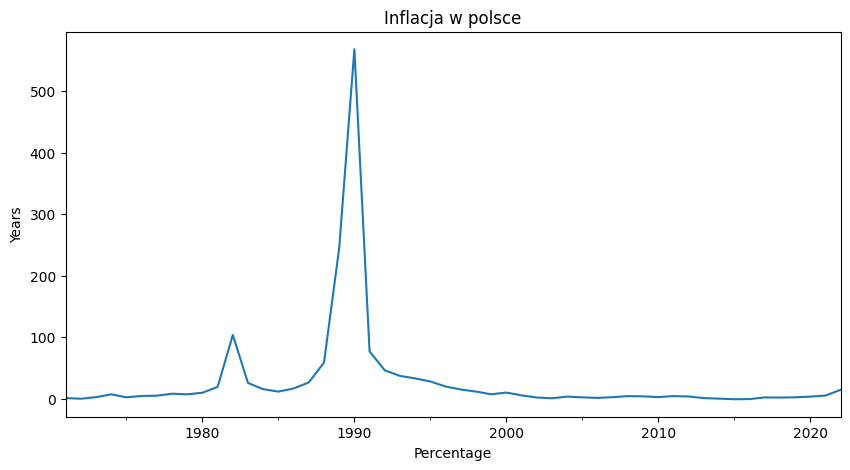

In [8]:
Inflation_PL = fred.get_series(series_id='FPCPITOTLZGPOL')
Inflation_GER = fred.get_series(series_id='FPCPITOTLZGDEU')
Inflation_TR = fred.get_series(series_id='FPCPITOTLZGTUR')

Inflation_PL.plot(figsize=(10, 5), title="Inflacja w polsce", xlabel="Percentage", ylabel="Years")

In [12]:
fig = px.line(Inflation_PL, labels={'value': 'Percentage', 'index': 'Year', 'variable': 'Countries'}, title="Inflation rate in Poland and other countries", line_group='variable')
fig.show()

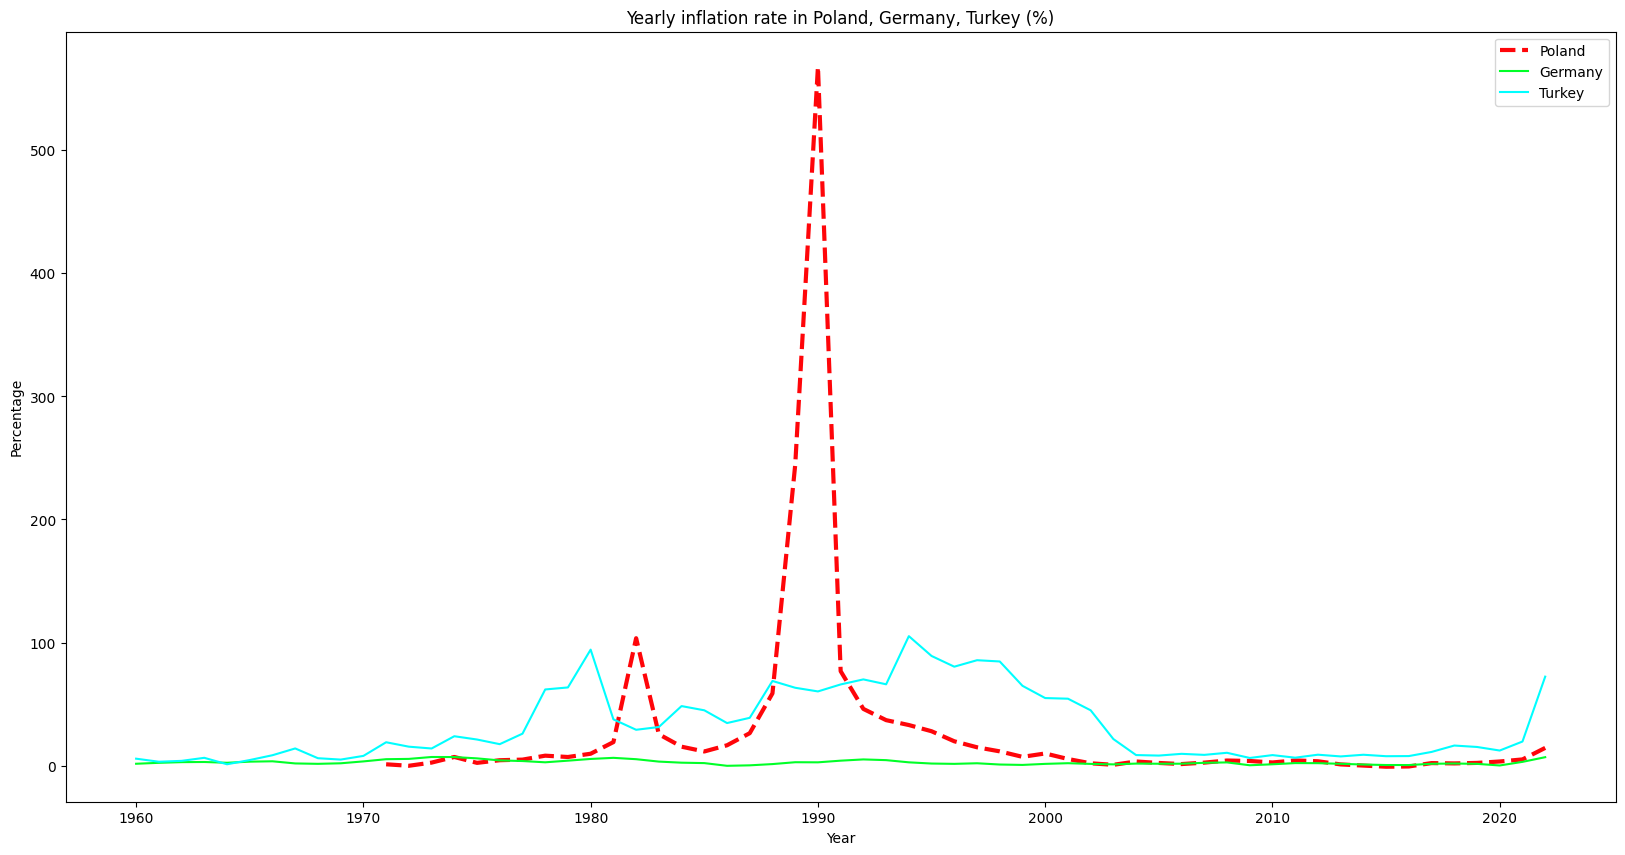

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(Inflation_PL, color='#FF0509', linestyle='--', label='Poland', linewidth=3)
plt.plot(Inflation_GER, color='#00FF28', label='Germany')
plt.plot(Inflation_TR, color='#00FEFF', label='Turkey')
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Yearly inflation rate in Poland, Germany, Turkey (%)")
plt.legend()
plt.show()

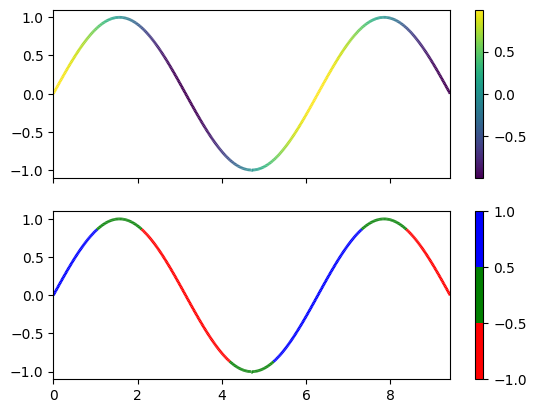

In [16]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as an N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

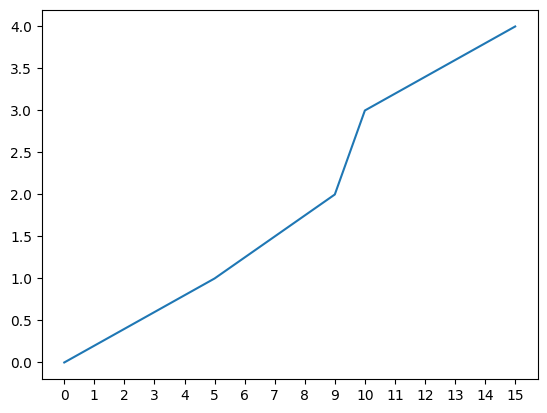

In [27]:
x = [0,5,9,10,15]
y = [0,1,2,3,4]
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()